# **Class Assignment: Categorical Variables and Analysis of Variance for Regression - Part II (20 points)**

#### **Meg Bucich**


---
**Instructions**: Complete the in-class assignment below.
- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- Your completed assignment must be submitted to Canvas as a .ipynb file by the deadline listed on Canvas
---

<br>

####<font color=red>Organized</font>
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 1</font>

The goal of this assignment is to provide you with practice interpreting and performing inference on categorical variables in R.

1. We will be working with a dataset `mtcars` already loaded into R's workspace. `mtcars` contains data on the attributes of several vehicles.  Run the following command to view the `mtcars` dataset

    `head(mtcars)`

2. We are interested in investigating the relationship between miles per gallon `mpg` (seconds) as our response and quarter mile time `qsec` and number of cylinders `cyl` as our predictors using a multiple linear regression.

  As always, we should plot our data before running our regressions!

  * Plot a scatterplot with `qsec` on the x-axis and  `mpg` on the y-axis. What are your observations? Is the relationships linear? quadratic? Is there no relationship? Explain your answer in complete sentences.

3. The relationship between our response and a categorical variable is often visualized using a boxplot.

  * Plot a boxplot using the code below. What are your observations? Explain your answer in complete sentences.
  ```
  boxplot(mtcars$mpg ~ mtcars$cyl,
        xlab = "Number of Cylinders",
        ylab = "mpg")
  ```

4. Is `cyl` a nominal or ordinal categorical variable?


In [2]:
#1
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [3]:
#2
qsec = mtcars$qsec #x1, predictor 1
mpg = mtcars$mpg #y, response
cyl = mtcars$cyl #x2, predictor 2

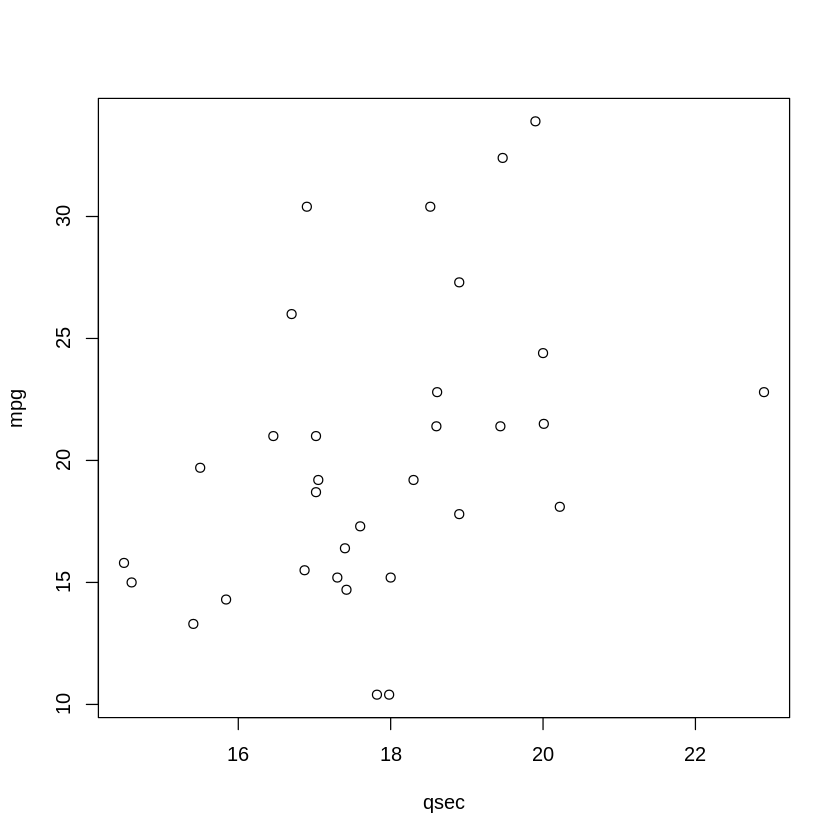

In [4]:
#3
plot(qsec, mpg)

there appears to be a positive linear relationship between mpg and qsec

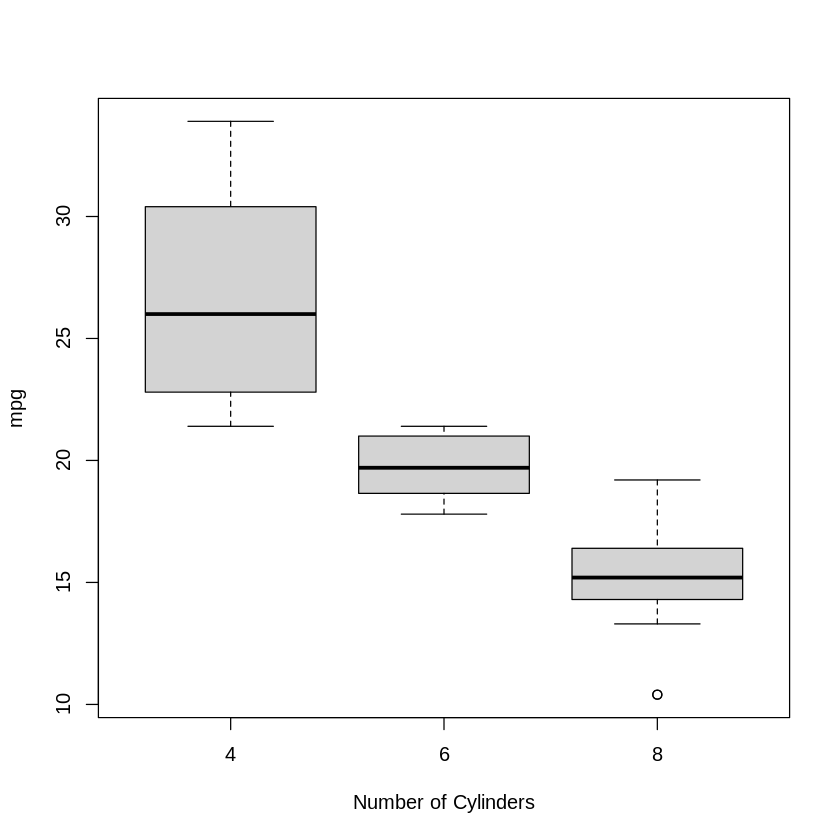

In [5]:
#3 cont
boxplot(mpg ~ cyl, xlab = "Number of Cylinders", ylab = "mpg")

In [6]:
#4

cyl is ordinal because it represents the number of cylinders so there is a natural ordering process

<br>

---

<br>






####<font color=red>Task 2</font>

1. Caution: R does not recognize `cyl` as a categorical variable. We must convert `cyl` into a factor. Run the code below to convert `cyl` into a factor.
```
class(mtcars$cyl)                     # checks the type of variable
mtcars$cyl <- as.factor(mtcars$cyl)   # convert to a factor
class(mtcars$cyl)                     # checks that it is a factor
```


2. Regress `mpg` on `qsec` and `cyl` using the built-in `lm()` function and store as the variable `fit`. Summarize the fit using `summary()`.

3. We would like to test if the categorical variable `cyl` is significant using the F-test. Therefore, we need to fit a reduced model without `cyl`. Fit a reduced model without `cyl` and store as `fit_reduced`.

4. Run an ANOVA F-test on `cyl` using the following code
```
anova(fit_reduced, fit)
```

5. Based on the ANOVA F-test, what is your conclusion about the relationship between `mpg` and `cyl`? Explain your answer in the context of variability in the response `mpg`.

In [33]:
#1 convert cyl into a categorical variable
class(cyl)   # checks the type of variable
cyl = as.factor(cyl)  # convert to a factor
class(cyl)   # checks that it is a factor

[1] "factor"

[1] "factor"

In [34]:
#2 full regression model, qsec and cyl are the predictors
fit_full = lm(mpg ~ qsec + cyl, data = mtcars)
summary(fit_full)


Call:
lm(formula = mpg ~ qsec + cyl, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4997 -1.7721 -0.2069  1.7569  7.5715 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  27.6419     7.2975   3.788  0.00074 ***
qsec         -0.4394     0.4003  -1.098  0.28168    
cyl4          7.4305     1.6208   4.584 8.63e-05 ***
cyl8         -5.1723     1.5630  -3.309  0.00258 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.212 on 28 degrees of freedom
Multiple R-squared:  0.7435,	Adjusted R-squared:  0.716 
F-statistic: 27.05 on 3 and 28 DF,  p-value: 2.017e-08


In [35]:
#3 reduced regression model, just qsec as the predictor
fit_reduced = lm(mpg ~ qsec, data = mtcars)
summary(fit_reduced)


Call:
lm(formula = mpg ~ qsec, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8760 -3.4539 -0.7203  2.2774 11.6491 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -5.1140    10.0295  -0.510   0.6139  
qsec          1.4121     0.5592   2.525   0.0171 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.564 on 30 degrees of freedom
Multiple R-squared:  0.1753,	Adjusted R-squared:  0.1478 
F-statistic: 6.377 on 1 and 30 DF,  p-value: 0.01708


In [36]:
#4
anova(fit_reduced, fit_full)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,30,928.6553,NA,NA,NA,NA
2,28,288.8325,2,639.8228,31.01285,7.926493e-08


In [11]:
#5 what can we conclude about mpg and cyl?


SSE full is 295.7819 and SSE reduced is 928.6553. Having $cyl$ in the model decreased our SSE which means that less of the variance was explained by the error. This means that $cyl$ explains a lot of the variance because we had a 'significantly large' reduction in the SSE. Meaning $cyl$ offers a lot of information for predicting mpg and should be included in our regression model.

<br>

---

<br>






####<font color=red>Task 3</font>

We will now perform the ANOVA F-test by hand (in R).

1. Calculate the $SSErr$ of the full model and store as `sserr_full`. Verify your answer from the ANOVA table from Task 2.

2. Calculate the $SSErr$ of the reduced model and store as `sserr_reduced`. Verify your answer from the ANOVA table from Task 2.

3. Calculate the F-statistic associated with testing `cyl` and store as `fstat`. Verify your answer from the ANOVA table from Task 2.

4. Calculate the p-value for the F-test using `pf()`. Verify your answer from the ANOVA table from Task 2.

In [37]:
#1 by hand calculate SSE full = 288.8325
cyl6 = cyl == 6
cyl8 = cyl == 8
yhat_full = 35.0724 - .4394*qsec - 7.4305*cyl6 - 12.6026*cyl8
sse_full = sum((mpg - yhat_full)^2)
sse_full

[1] 288.8325

In [38]:
#2 by hand calculate SSE reduced = 928.6553
yhat_reduced = -5.1140 + 1.4121*qsec
sse_reduced = sum((mpg - yhat_reduced)^2)
sse_reduced

[1] 928.6553

In [40]:
#3 by hand calculate
df_reduced = 30
df_full = 28
num =  (sse_reduced - sse_full) / (df_reduced - df_full)
denom = sse_full / df_full
fstat = num / denom
fstat

[1] 31.01285

In [41]:
#4 by hand calculate p = 7.926e-08
pval = pf(fstat, df_reduced - df_full,df_full, lower.tail = FALSE)
pval

[1] 7.926493e-08

<br>

---

<br>






####<font color=red>Task 4</font>

1. Install the `rsq` package, which enables you to calculate partial $R^2$ (may take a couple minutes).
```
system('sudo apt install libudunits2-dev')  # some system requirement for colab (ignore)
install.packages("rsq")                     # installs package
library(rsq)                                # loads the installed package
```

2. Calculate the partial $R^2$ for `cyl` using the following command
```
rsq.partial(fit, fit_reduced)
```

3. Calculate the partial $R^2$ for `cyl` by hand (in R code). Verify your answer with Task 3.2.

4. What is the interpretation of the partial $R^2$ for `cyl`?


In [20]:
#1 install package
system('sudo apt install libudunits2-dev')  # some system requirement for colab (ignore)
install.packages("rsq")                     # installs package
library(rsq)                                # loads the installed package

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Rdpack’, ‘RcppArmadillo’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘robslopes’, ‘lme4’, ‘mcr’




In [21]:
#2 calculate partial R^2 using command
rsq.partial(fit_full,fit_reduced)

$adjustment
[1] FALSE

$variables.full
[1] "qsec" "cyl" 

$variables.reduced
[1] "qsec"

$partial.rsq
[1] 0.6814944

In [22]:
#3 calculate partial R^2 by hand
R2_partial = (sse_reduced - sse_full) / (sse_reduced)
R2_partial

[1] 0.6889777

In [ ]:
#4 interpret R^2 for cyl

the coefficient of partial determination is the percentage of error from the reduced model now explained by the full model.

<br>

---

<br>






####<font color=red>Task 5 </font>

Based the answers to the following questions on the summary of the full model (`fit`).

1. Assuming `qsec = 0`, what is the average miles per gallon among 4-cylinder vehicles?

2. Assuming `qsec = 0`, what is the average miles per gallon among 6-cylinder vehicles?

3. Assuming `qsec = 0`, what is the average miles per gallon among 8-cylinder vehicles?

4. Is $\hat{\beta}_{\text{cyl6}}$ significantly different from 0 at the 5% type I error level? What is the interpretation of the estimate $\hat{\beta}_{\text{cyl6}}$? Explain your answer in complete sentences.

5. Is $\hat{\beta}_{\text{cyl8}}$ significantly different from 0 at the 5% type I error level? What is the interpretation of the estimate $\hat{\beta}_{\text{cyl8}}$? Explain your answer in complete sentences.

In [28]:
#1
cyl = as.factor(cyl)
fit_full = lm(mpg ~ qsec + cyl, data = mtcars)
summary(fit_full)
yhat_full = 35.0724 - .4394*qsec - 7.4305*cyl6 - 12.6026*cyl8


Call:
lm(formula = mpg ~ qsec + cyl, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4997 -1.7721 -0.2069  1.7569  7.5715 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  27.6419     7.2975   3.788  0.00074 ***
qsec         -0.4394     0.4003  -1.098  0.28168    
cyl4          7.4305     1.6208   4.584 8.63e-05 ***
cyl8         -5.1723     1.5630  -3.309  0.00258 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.212 on 28 degrees of freedom
Multiple R-squared:  0.7435,	Adjusted R-squared:  0.716 
F-statistic: 27.05 on 3 and 28 DF,  p-value: 2.017e-08


average mpg among cyl = 4 is just $\hat\beta_{0} = 35.0724$

In [ ]:
#2

In [26]:
35.0724 + 7.4305

[1] 42.5029

average mpg among cyl = 6 is just $$\hat\beta_{0} + \hat\beta_{cyl6} = 35.0724 + 7.4305 = 42.5029 $$

In [27]:
#3
35.0724 - 12.6026

[1] 22.4698

average mpg among cyl = 8 is just $$\hat\beta_{0} + \hat\beta_{cyl8} = 35.0724 - 12.6026 = 22.4698 $$

In [ ]:
#4

$\hat\beta_{cly6}$ is significantly different than 0 because we have a p-value less than .05. This means that 6-cylinder-vehicles have on additional 7.4305 mpg on average than 4-cylinder-vehicles.  

In [ ]:
#5

$\hat\beta_{cly8}$ is significantly different than 0 because we have a p-value less than .05. This means that 4-cylinder-vehicles have on additional 12.6026 mpg on average than 8-cylinder-vehicles.  

<br>

---

<br>






####<font color=red>Task 6 </font>

Based the answers to the following questions on the summary of the full model (`fit`).

1. Using the summary, are you able to quickly test if the average mpg difference between 6-cylinder and 8-cylinder vehicles is significantly different from zero? Why/Why not?

2. A way to test the average difference in mpg between 6- and 8-cylinder vehicles is to change our reference category. Run the code below to change 6-cylinder to be our reference category, then re-run the `lm()` and `summary()`.
```
# reorders the levels of cyl so that "6" is our reference
mtcars$cyl <- factor(mtcars$cyl, levels = c("6", "4", "8"))
```

3. Is there a significant difference in average mpg between 6-cylinder vehicles and 8-cylinder vehicles? Explain your answer in complete sentences.

In [23]:
summary(fit_full)


Call:
lm(formula = mpg ~ qsec + cyl, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2211 -1.9458 -0.1877  1.5171  7.8529 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  47.3817     8.8066   5.380 8.82e-06 ***
qsec         -0.4415     0.3980  -1.109    0.276    
cyl          -3.1370     0.3982  -7.877 1.09e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.194 on 29 degrees of freedom
Multiple R-squared:  0.7373,	Adjusted R-squared:  0.7192 
F-statistic:  40.7 on 2 and 29 DF,  p-value: 3.815e-09


In [ ]:
#1

no because the indicator variable is 4-cylinder-vehicles so the $\hat\beta_{i}$ values are the average differences between $cyl_{4}$

In [25]:
#2
# reorders the levels of cyl so that "6" is our reference
mtcars$cyl <- factor(mtcars$cyl, levels = c("6", "4", "8"))
fit_full = lm(mpg ~ qsec + cyl, data = mtcars)
summary(fit_full)


Call:
lm(formula = mpg ~ qsec + cyl, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4997 -1.7721 -0.2069  1.7569  7.5715 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  27.6419     7.2975   3.788  0.00074 ***
qsec         -0.4394     0.4003  -1.098  0.28168    
cyl4          7.4305     1.6208   4.584 8.63e-05 ***
cyl8         -5.1723     1.5630  -3.309  0.00258 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.212 on 28 degrees of freedom
Multiple R-squared:  0.7435,	Adjusted R-squared:  0.716 
F-statistic: 27.05 on 3 and 28 DF,  p-value: 2.017e-08


In [ ]:
#3

yes, there is a significant difference in average mpg between 6-cylinder vehicles and 8-cylinder vehicles because when we used 6-cylinder-vehicles as the indicator variable, $cyl_{8}$ had a pvalue of less than .05 and we can conclude 6-cylinder-vechiles have an additional 5.1723 mpg on average when compared to 8-cylinder-vehicles